## 3. Feature Engineering
### 3-1. 다시 패키지와 데이터 불러오기 

In [20]:
# 패키지 import 
import pandas as pd
import numpy as np

# 그래프 관련 패키지 import 
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지

import seaborn as sns
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"


# 모델링 관련 패키지 import 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings   # 버전 충돌로 나오는 경고 표시를 표시하지 않게 설정 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc   
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 사전 전처리 한 데이터 불러오기 
df_db_v2 = pd.read_csv('data/moduparkingDB.csv')
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


### 3-2. Feature Engineering을 위한 전처리 

#### 1. 가입일 1970년도 데이터 제거 

In [3]:
df_db_v2[df_db_v2['JOIN_YEAR']==1970]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
437,1081430,1970-01-01,1970,1,1,CC,90070,A,2020-01-01,2020,1,1,Wed,1,GD
2196,1410151,1970-01-01,1970,1,1,CC,92437,B,2020-01-02,2020,1,2,Thu,1,J
2204,1415023,1970-01-01,1970,1,1,CC,131081,A,2020-01-02,2020,1,2,Thu,1,YO
2434,125582,1970-01-01,1970,1,1,CC,91885,A,2020-01-03,2020,1,3,Fri,1,YD
2645,602188,1970-01-01,1970,1,1,CC,2334,B,2020-01-03,2020,1,3,Fri,1,MP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-26,2020,12,26,Sat,1,JR
867913,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-27,2020,12,27,Sun,1,JR
868210,1825656,1970-01-01,1970,1,1,CC,219936,A,2020-12-27,2020,12,27,Sun,1,YD
873707,1828010,1970-01-01,1970,1,1,CC,220635,C,2020-12-29,2020,12,29,Tue,1,GN


In [4]:
# 가입일 1970년도를 제거
df_db_v2 = df_db_v2[df_db_v2.JOIN_YEAR != 1970]

#### 2. User ID 999665 데이터 제거

In [5]:
df_db_v2[df_db_v2['USER_ID']==999665]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
372,999665,2018-12-16,2018,12,16,CC,82399,A,2020-01-01,2020,1,1,Wed,6,JRR
1527,999665,2018-12-16,2018,12,16,CC,104988,A,2020-01-02,2020,1,2,Thu,11,GN
3121,999665,2018-12-16,2018,12,16,CC,181832,A,2020-01-03,2020,1,3,Fri,7,SC
5034,999665,2018-12-16,2018,12,16,CC,109223,A,2020-01-04,2020,1,4,Sat,28,MP
6919,999665,2018-12-16,2018,12,16,CC,104916,A,2020-01-05,2020,1,5,Sun,14,GN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,2018,12,16,CC,2428,A,2020-12-27,2020,12,27,Sun,17,CY
868847,999665,2018-12-16,2018,12,16,CC,109267,A,2020-12-28,2020,12,28,Mon,24,J
871562,999665,2018-12-16,2018,12,16,CC,90193,C,2020-12-29,2020,12,29,Tue,23,GW
874317,999665,2018-12-16,2018,12,16,CC,220797,D,2020-12-30,2020,12,30,Wed,40,GS


In [7]:
# 해당 아이디 제거
df_db_v2 = df_db_v2[df_db_v2['USER_ID'] != 999665]

In [8]:
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


#### 3. Ontehot Encoding 
- 보고픈 데이터가 문자열 데이터이므로, 추후 의믜 있는 자료를 살펴보기 위해 문자열을 정수형태로 전환함
    - D_TYPE
    - GOOD_TYPE
    - WEEKDAY
    - AD1

In [9]:
# Feature Onehot Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ndf = df_db_v2.copy()

ndf['D_TYPE'] = le.fit_transform(ndf['D_TYPE'])
ndf['GOODS_TYPE'] = le.fit_transform(ndf['GOODS_TYPE'])
ndf['WEEKDAY'] = le.fit_transform(ndf['WEEKDAY'])
ndf['AD1'] = le.fit_transform(ndf['AD1'])

print(ndf['D_TYPE'].unique())
print(ndf['GOODS_TYPE'].unique())
print(ndf['WEEKDAY'].unique())
print(ndf['AD1'].unique())

[0 1 2]
[0 2 1 3]
[6 4 0 2 3 1 5]
[39 49 63 52 51 80 37 81 43 30  4 22  0 14 53 19 79 64 31 44 23 60 29 42
 36 62 47 55 45 50 32 35 38 12 66  7  5 28 46 13 56 33 48 20 34 27 76 21
  3 16 40 69  1 24 74  6 83 26 57  8 82 61 58 25 68  9 77 10 70 15 67 65
 59 11 17 72 73 54 75 41 78 18  2 71]


In [15]:
# 비교를 위해 원 데이터 unique 값 출력 
print(df_db_v2['D_TYPE'].unique())
print(df_db_v2['GOODS_TYPE'].unique())
print(df_db_v2['WEEKDAY'].unique())
print(df_db_v2['AD1'].unique())

['AA' 'BB' 'CC']
['A' 'C' 'B' 'D']
['Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue']
['GN' 'J' 'SC' 'MP' 'JRR' 'YD' 'GJ' 'YO' 'GSN' 'GBC' 'BF' 'DJ' '0' 'CD'
 'NO' 'CY' 'YC' 'SD' 'GD' 'GSW' 'DM' 'R' 'GB' 'GS' 'GHN' 'SB' 'IND' 'P'
 'GW' 'JR' 'GEJ' 'GGY' 'GKP' 'CAS' 'SG' 'BJG' 'BHW' 'GAY' 'GYI' 'CCA'
 'PJP' 'GGC' 'IYS' 'DB' 'GGM' 'GAS' 'WOID' 'DIV' 'AOI' 'COI' 'GPJ' 'SOI'
 'ABP' 'DOI' 'WF' 'BI' 'ZP' 'EP' 'Q' 'BO' 'ZE' 'RRR' 'QGI' 'DSO' 'SOD'
 'BOI' 'WT' 'BP' 'SP' 'CN' 'SJV' 'SDU' 'QH' 'BUD' 'CU' 'VU' 'WAE' 'NW'
 'WH' 'GR' 'X' 'CVB' 'ADS' 'VO']


## 4. EDA2 - 관계있는 데이터 살펴 보기 

### 4-1. 상관관계 분석으로 분석해보기 

In [17]:
ndf.drop(['USER_ID','JOIN_DATE', 'JOIN_DAY', 'JOIN_MONTH', 'STORE_ID', 'DATE', 'PAY_DAY'],axis=1,inplace=True)

In [18]:
ndf

,JOIN_YEAR,D_TYPE,GOODS_TYPE,PAY_YEAR,PAY_MONTH,WEEKDAY,COUNT,AD1
0,2014,0,0,2020,1,6,1,39
1,2014,1,0,2020,1,6,1,49
2,2014,1,0,2020,1,6,1,63
3,2014,1,2,2020,1,6,1,52
4,2014,0,2,2020,1,6,1,51
...,...,...,...,...,...,...,...,...
879266,2020,1,1,2020,12,4,1,39
879267,2020,1,1,2020,12,4,1,19
879268,2020,0,1,2020,12,4,1,51
879269,2020,1,1,2020,12,4,1,49


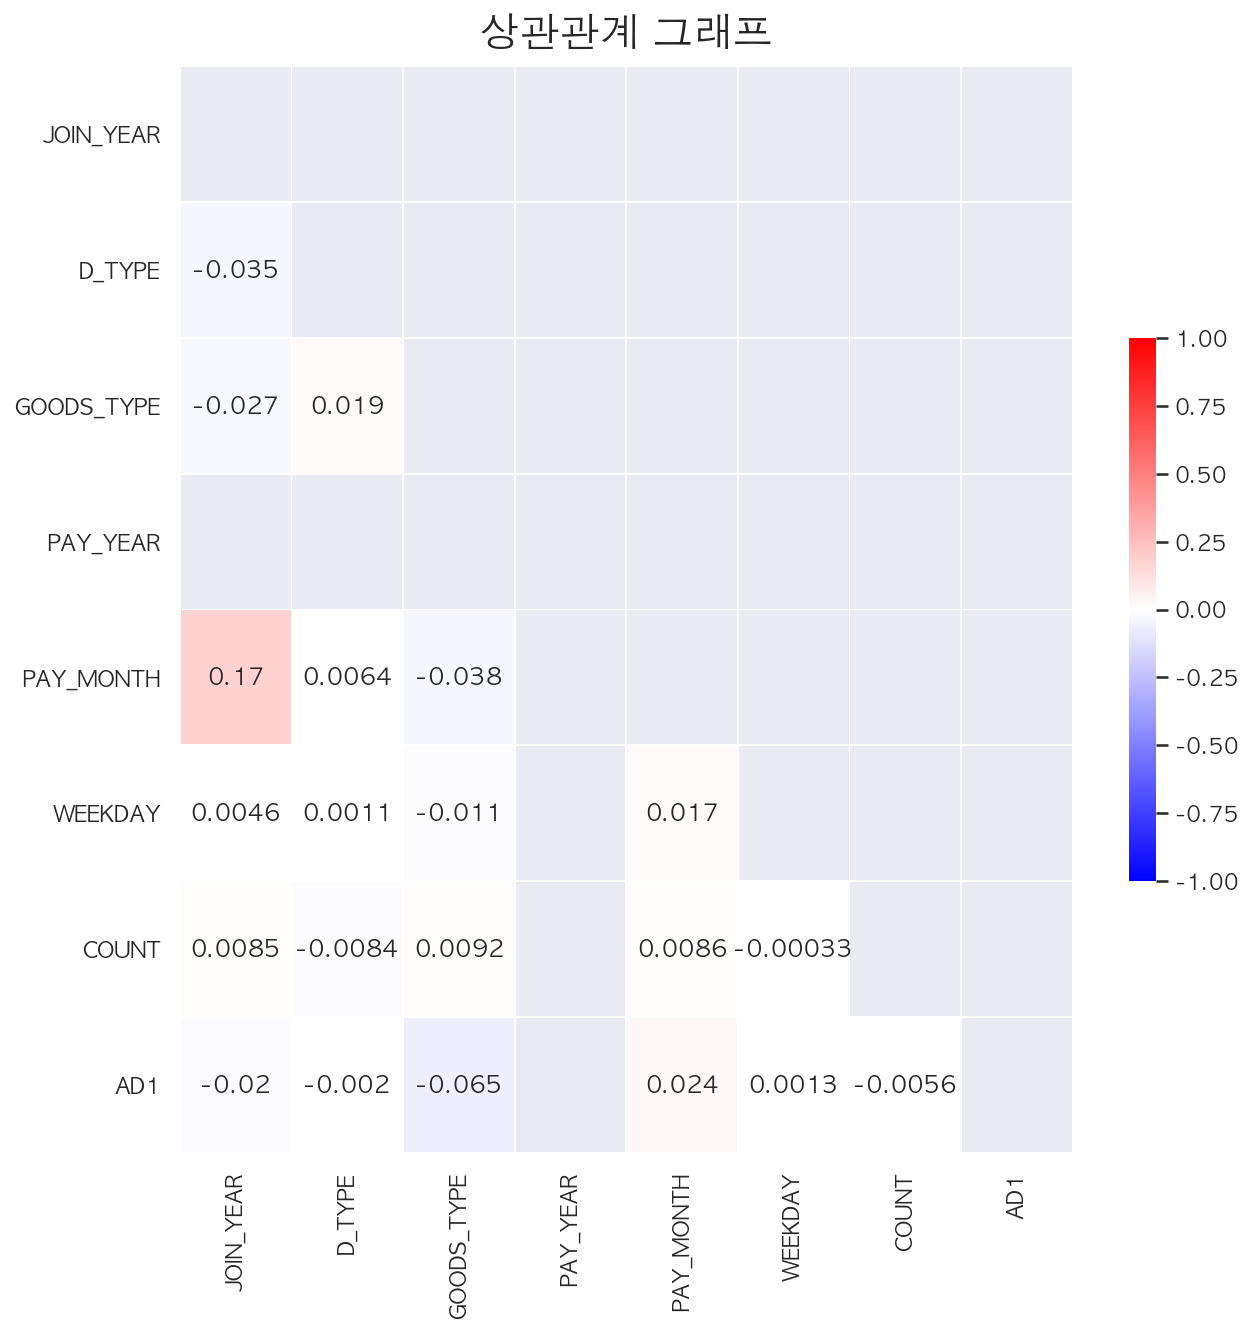

In [21]:
# 상관관계 그래프로 나타내기

a = ndf.corr()

# 사이즈 지정 
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기 
sns.heatmap(a, 
            cmap = 'bwr', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정 
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 젋반으로 줄이기 
            vmin = -1,vmax = 1    # 컬러바 범위 -1 ~ 1
           )  
plt.title('상관관계 그래프', fontsize=20, pad=10)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 #          square=True, linewidths=.5, annot=True)
plt.show()

- 대체적으로 데이터 자체가 모든 상관관계가 없는 것으로 나온다.
- 하지만 개중에 양의 상관관계를 찾아보자면 다음과 같다 
    1. D_TYPE과 GOODS_TYPE
    2. PAY_MONTH와 AD1
    3. PAY_MONTH와 D_TYPE
    4. GOODS_TYPE과 COUNT


In [26]:
# D_TYPE의 패턴 : 주기성 확인
df_db_v2.groupby(['JOIN_DATE', 'D_TYPE']).size().unstack(fill_value=0)

D_TYPE,AA,BB,CC
JOIN_DATE,,,
2013-12-16,2,0,0
2013-12-17,3,23,0
2013-12-18,1,0,0
2013-12-21,2,0,0
2013-12-22,0,2,0
...,...,...,...
2020-12-27,54,48,0
2020-12-28,83,52,0
2020-12-29,66,49,0


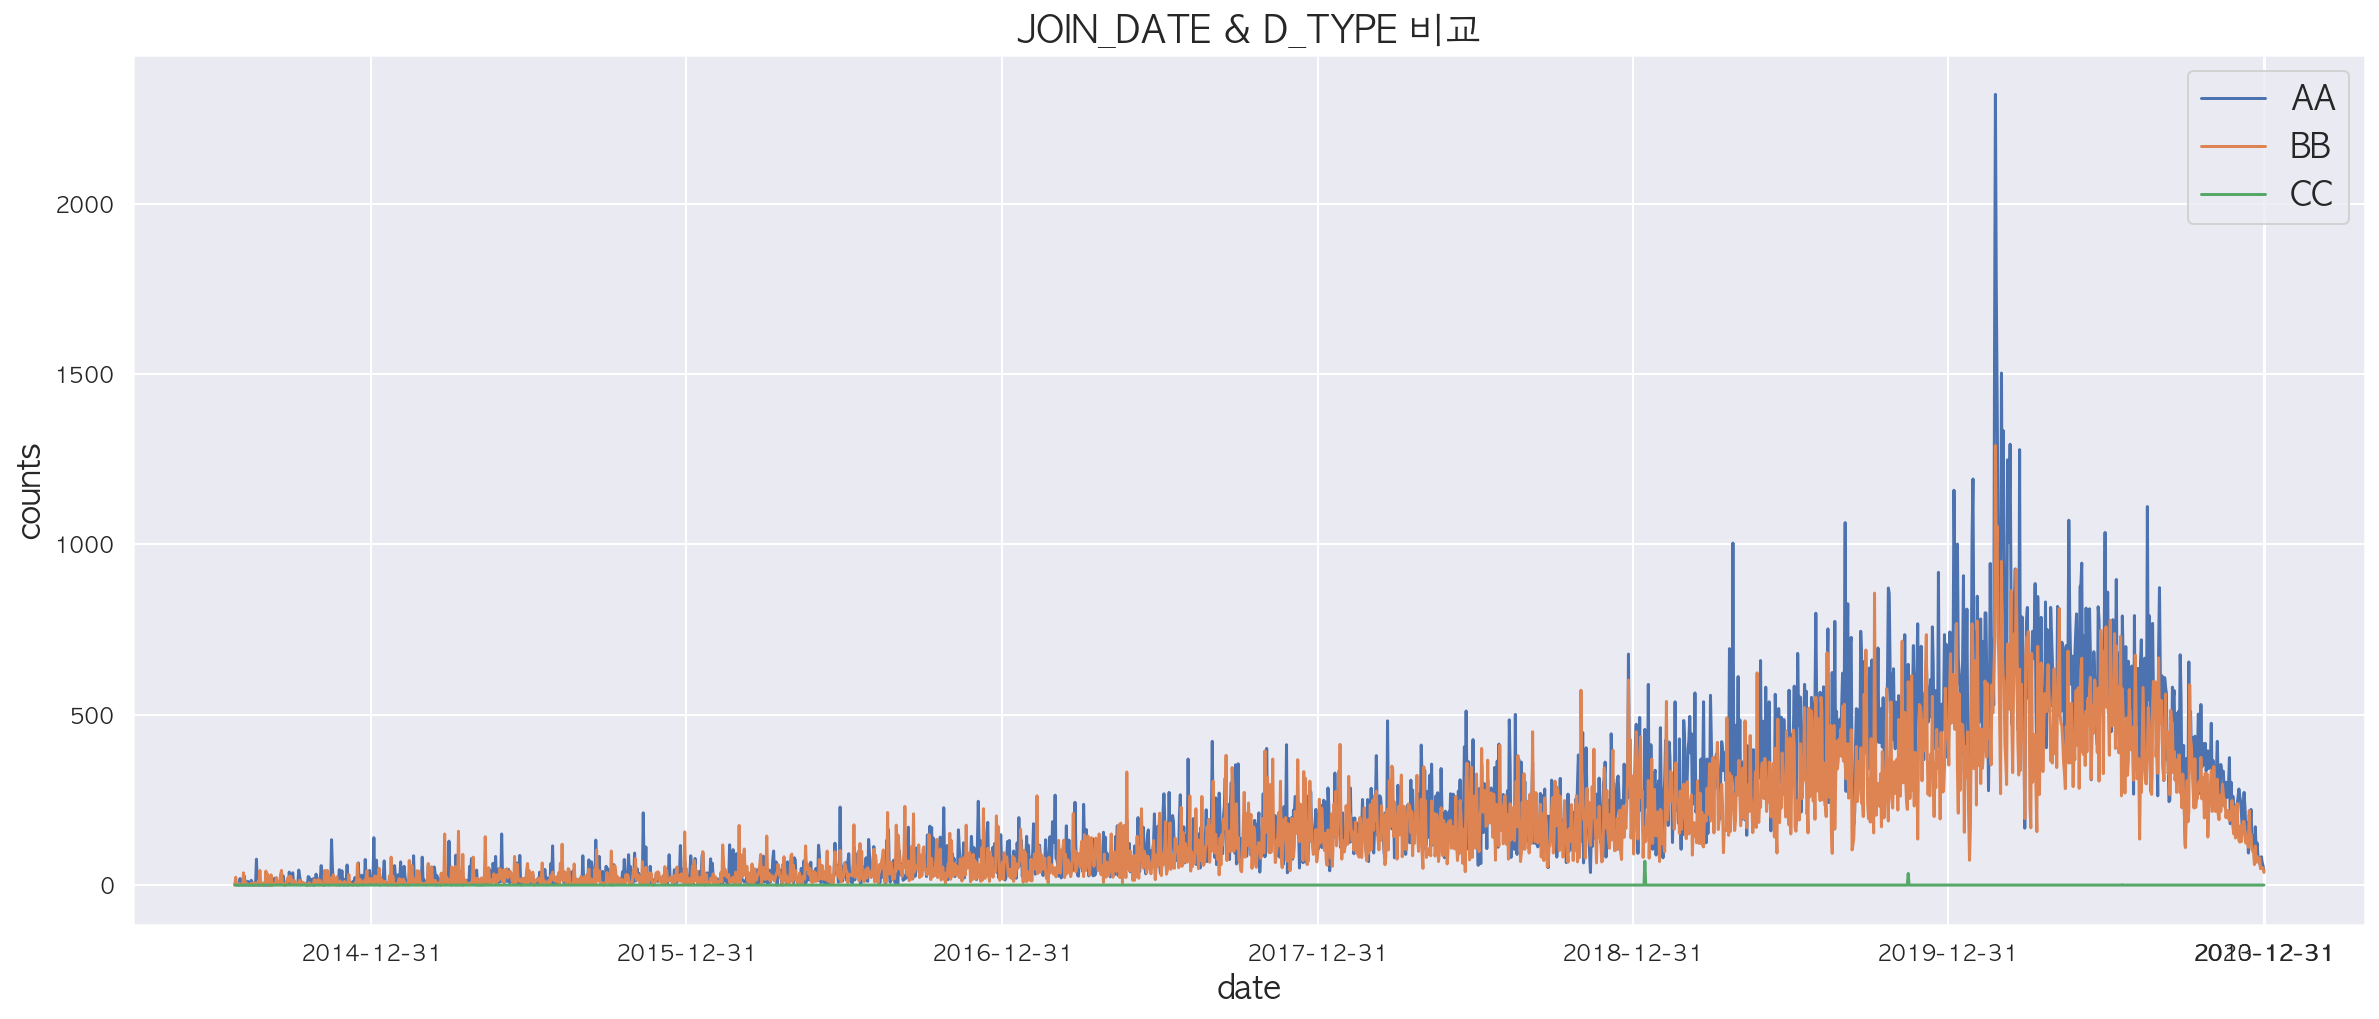

In [27]:
# goods_type 별 결제량 시각화
joinbydate = df_db_v2.groupby(['JOIN_DATE', 'D_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(joinbydate.index, joinbydate['AA'])
sns.lineplot(joinbydate.index, joinbydate['BB'])
sns.lineplot(joinbydate.index, joinbydate['CC'])

plt.legend(['AA', 'BB', 'CC'], loc='best', fontsize=16)
plt.title('JOIN_DATE & D_TYPE 비교', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'])
plt.show()

- 가설 검증 - 가설 검정을 위해 다음과 같이 정의
    1. 영가설 : D_TYPE과 GOODS_TYPE은 관계가 없을 것이다.
    2. 대립가설 :  D_TYPE과 GOODS_TYPE은 관계가 없을 것이다.
    - 유의 수준을 α를 0.05로 가정 (잘못된 의사결정을 내리 확률이 0.05라는 것을 의미)
    - **유의수준** : 가설검정에서 귀무가설이 실제로 참일 때 귀무가설에 대한 판단의 오류수준(잘못을 기각할 확률)을 말함. **α**는 표본을 추출하기 이전에 설정하여 표본에서 얻은 결과가 우리의 선택에 영향을 미치지 않도록 한다. 보통 표본통계치가 나올 확률 p가 0.05 또는 0.01인 점을 유의수준으로 설정함.

In [28]:
# D_TYPE을 기준으로 GOODS_TYPE count하여 피벗테이블로 셋팅
observe = df_db_v2.pivot_table('USER_ID', ['D_TYPE'], 'GOODS_TYPE', aggfunc='count').reset_index()
observe.columns.name
observe = observe.set_index('D_TYPE')
observe

GOODS_TYPE,A,B,C,D
D_TYPE,,,,
AA,345779,65966,70010,11411
BB,262876,52435,60903,8327
CC,77,8,15,5


In [29]:
# 카이제곱, P-value 계산
from scipy import stats  
chi2, p, dof, expected = stats.chi2_contingency(observe)
print("카이제곱 결과: ", chi2)
print("자유도 결과: ", dof)
print("P-Value 결과: ", p)

카이제곱 결과:  524.1010110891614
자유도 결과:  6
P-Value 결과:  5.39468417109281e-110


In [ ]:
# goods_type의 패턴 : 주기성 확인
df_db_v2.groupby(['DATE', 'GOODS_TYPE']).size().unstack(fill_value=0).loc['2020-01-01':'2020-01-31',:]

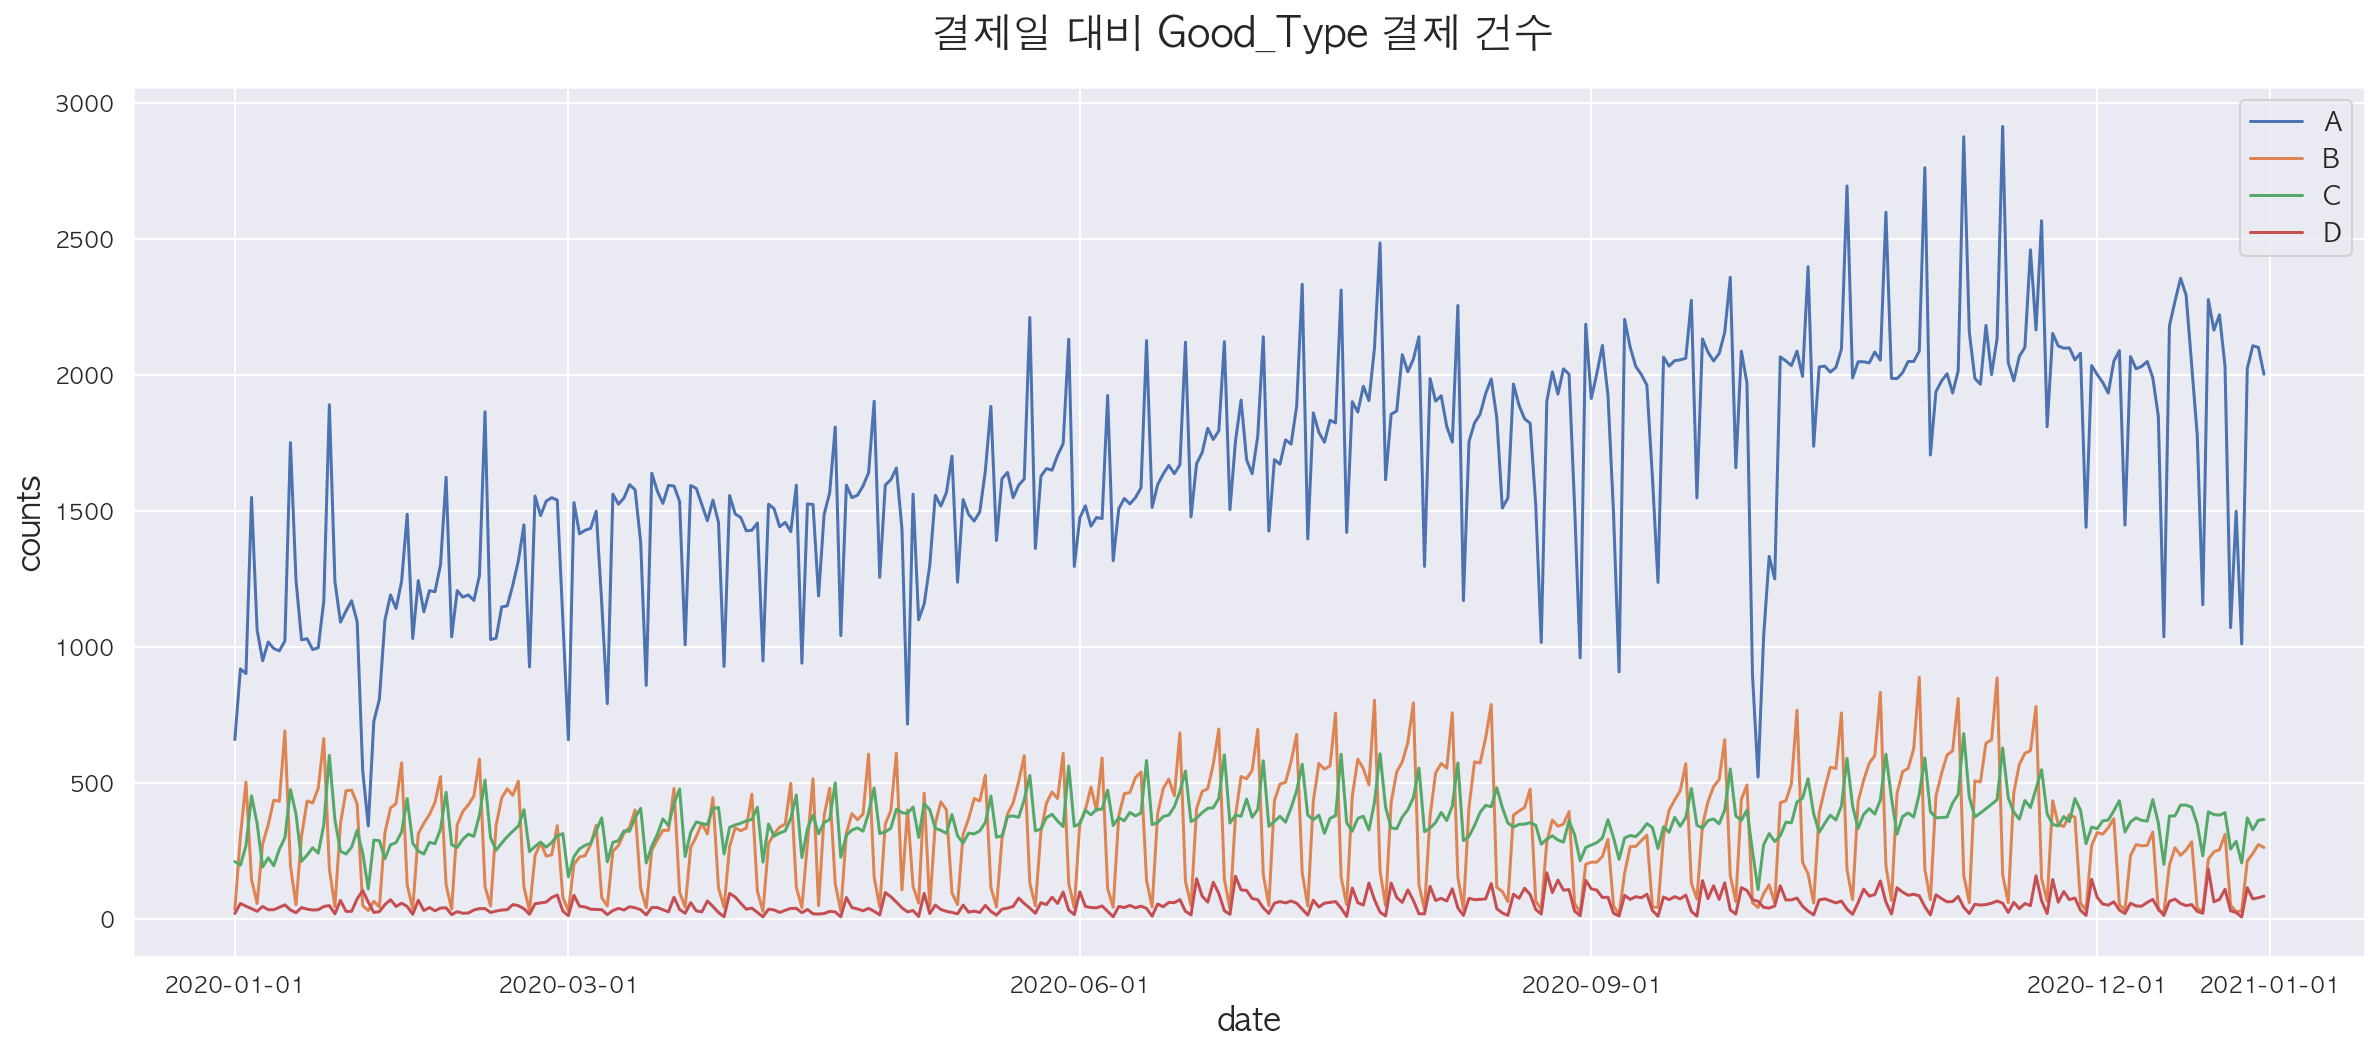

In [30]:
# goods_type 별 결제량 시각화
countbydate = df_db_v2.groupby(['DATE', 'GOODS_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=13)
plt.title('결제일 대비 Good_Type 결제 건수 ', fontsize=20, pad=20)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2020-01-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-01-01'])
plt.show()